In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,f1_score,confusion_matrix,accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions


In [ ]:
!pip install dtreeviz

In [ ]:
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG  

In [ ]:
x,y = load_breast_cancer(return_X_y=True,as_frame=True)

In [ ]:
x.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
334,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.1840,1.5320,1.199,13.24,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.35,28.46,84.53,544.3,0.1222,0.09052,0.036190,0.03983,0.2554,0.07207
394,12.100,17.72,78.07,446.2,0.10290,0.09758,0.047830,0.033260,0.1937,0.06161,0.2841,1.6520,1.869,22.22,0.008146,0.016310,0.018430,0.007513,0.02015,0.001798,13.56,25.80,88.33,559.5,0.1432,0.17730,0.160300,0.06266,0.3049,0.07081
198,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.067720,0.1767,0.05529,0.4357,1.0730,3.833,54.22,0.005524,0.036980,0.027060,0.012210,0.01415,0.003397,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.386500,0.17080,0.3193,0.09221
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.097300,0.052520,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.045420,0.034830,0.021880,0.02542,0.010450,10.28,16.38,69.05,300.2,0.1902,0.34410,0.209900,0.10250,0.3038,0.12520
333,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418


In [ ]:
y.sample(5)

192    1
249    1
59     1
529    1
32     0
Name: target, dtype: int64

In [ ]:
x.shape,y.shape

((569, 30), (569,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_split=25,max_depth=4,max_features=8)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9298245614035088

In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.16605072, 0.        , 0.        ,
       0.        , 0.        , 0.62742947, 0.        , 0.00971541,
       0.        , 0.        , 0.01113656, 0.        , 0.        ,
       0.0013506 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.030488  , 0.        , 0.09129806, 0.        ,
       0.        , 0.01106797, 0.04923017, 0.00223305, 0.        ])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


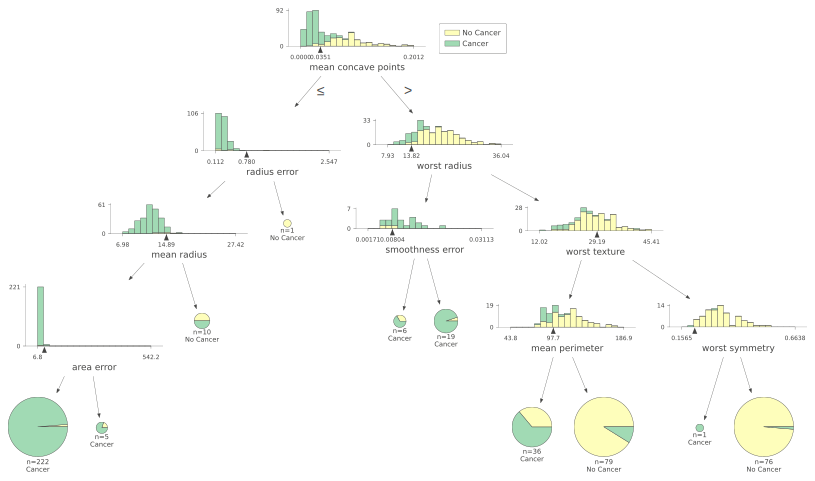

In [ ]:
viz = dtreeviz.model(clf,
               x_train,
               y_train,
               feature_names=x_train.columns,
               class_names=['No Cancer','Cancer'])
viz.view()

### Randomized search on hyper parameters.
The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.<br>
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [ ]:
params = {  'max_depth':[3,4,5,6,7],
            'min_samples_split':[10,15,20,25,30,50],
            'splitter':['best','random'],
            'min_samples_leaf':[10,15,20],
            'max_features':[4,6,8]
          }
rnd = RandomizedSearchCV(estimator=clf,param_distributions=params,cv=10,n_iter=10)
rnd.fit(x_train,y_train)
rnd.best_score_,rnd.best_params_

(0.92743961352657,
 {'splitter': 'best',
  'min_samples_split': 10,
  'min_samples_leaf': 15,
  'max_features': 6,
  'max_depth': 3})

In [ ]:
grid = GridSearchCV(clf,params,cv=10)
grid.fit(x_train,y_train)
grid.best_score_,grid.best_params_

(0.9405314009661836,
 {'max_depth': 4,
  'max_features': 6,
  'min_samples_leaf': 10,
  'min_samples_split': 25,
  'splitter': 'best'})

In [ ]:
pca = PCA(n_components=8)
x_train_trans = pca.fit_transform(x_train)
x_test_trans = pca.transform(x_test)

grid.fit(x_train_trans,y_train)
y_pred = grid.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8051282051282052

In [ ]:
pca.components_.shape,pca.explained_variance_

((8, 30),
 array([4.56734545e+05, 6.05800824e+03, 4.92324833e+02, 5.59752713e+01,
        3.77986491e+01, 3.04450935e+00, 1.79172789e+00, 3.54112538e-01]))

In [ ]:
grid.best_score_,grid.best_params_

(0.9405314009661836,
 {'max_depth': 3,
  'max_features': 8,
  'min_samples_leaf': 10,
  'min_samples_split': 10,
  'splitter': 'best'})

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=20,min_samples_leaf=10,max_features=8,max_depth=5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)

0.7271794871794872

In [ ]:
f1_score(y_test,y_pred,average=None)


array([0.91358025, 0.95238095])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[37,  2],
       [ 5, 70]])

In [ ]:
tree.plot_tree(clf)

In [ ]:
lr = LogisticRegression(multi_class='auto',penalty='l1',solver='liblinear',C=0.6)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
confusion_matrix(y_test,y_pred_lr)

array([[37,  2],
       [ 3, 72]])

In [ ]:
f1_score(y_test,y_pred_lr)

0.9664429530201343

In [ ]:
lr.coef_,lr.intercept_

(array([[ 3.76454603,  0.03474194, -0.10784424, -0.0162842 ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.74572545,  0.        , -0.08552138,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -0.26244219, -0.12522281, -0.01347127,  0.        ,
          0.        , -2.06399283,  0.        ,  0.        ,  0.        ]]),
 array([0.]))

In [ ]:
###

### Voting ensemble of different algos

In [ ]:
estimators = [('lr',LogisticRegression(multi_class='multinomial',solver='newton-cg',penalty='l2',C=0.8,max_iter=1000)),('dt1',DecisionTreeClassifier(max_depth=5)),('dt2',DecisionTreeClassifier(max_depth=4))]
ensemble = VotingClassifier(estimators=estimators)
ensemble.fit(x_train,y_train)
y_pred_en = ensemble.predict(x_test)
f1_score(y_test,y_pred_en)

0.9729729729729729

In [ ]:
score = cross_val_score(ensemble,x,y,scoring='r2',cv=10)
score.mean()

0.6849783549783549

In [ ]:
ensemble.voting

'hard'

In [ ]:
ensemble.named_estimators_

{'lr': LogisticRegression(),
 'dt1': DecisionTreeClassifier(max_depth=5),
 'dt2': DecisionTreeClassifier(max_depth=4)}

In [ ]:
ensemble.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt1', DecisionTreeClassifier(max_depth=5)),
                             ('dt2', DecisionTreeClassifier(max_depth=4))])>

### Bagging ensemble(bootrstrapping+aggregation) technique to train base members with different bootstrap samples drawn same training dataset.
Some variations or types of bagging :- <br>
1.pasting - row sampling without replacement or bootstrap<br>
2.random subspaces - column(feature) sampling with/o bootstrap<br>
3.random patches - combination of row and feature sampling <br>

In [ ]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=0.25,
                        bootstrap=True,
                        max_features=1.0,
                        bootstrap_features=False,
                        oob_score=True)
#Whether to use out-of-bag samples to estimate
#the generalization error. Only available if bootstrap=True.

In [ ]:
bag.fit(x_train,y_train)
y_pred = bag.predict(x_test)
f1_score(y_test,y_pred),bag.oob_score_

(0.9798657718120806, 0.9428571428571428)

### Pasting

In [ ]:
bag1 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=0.25,
                        bootstrap=False, #no replacement of samples
                        max_features=1.0,
                        bootstrap_features=False)

In [ ]:
bag1.fit(x_train,y_train)
y_pred = bag1.predict(x_test)
f1_score(y_test,y_pred)

0.9798657718120806

In [ ]:
accuracy_score(y_test,y_pred)

0.9736842105263158

### 2. Random subspaces

In [ ]:
bag2 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=1.0, #no row sampling
                        bootstrap=False, #no replacement of samples
                        max_features=0.5, #feature sampling for 50% features
                        bootstrap_features=True)

In [ ]:
bag2.fit(x_train,y_train)
y_pred = bag2.predict(x_test)
f1_score(y_test,y_pred)

0.9798657718120806

### 3. Random Patches

In [ ]:
bag3 = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=0.25, #row sampling
                        bootstrap=True, #with replacement of samples
                        max_features=0.5, #feature sampling for 50% features
                        bootstrap_features=True,
                        oob_score=True)

In [ ]:
bag3.fit(x_train,y_train)
y_pred = bag3.predict(x_test)
f1_score(y_test,y_pred),bag3.oob_score_

(0.9866666666666668, 0.9406593406593406)

In [ ]:
params = { 'n_estimators' :[100,120,150,500],
            'max_samples':[0.25,0.5]
          }
grid = GridSearchCV(estimator=bag3,param_grid=params,n_jobs=-1,cv=10) #n_jobs=-1 means using all processors
grid.fit(x_train,y_train)
grid.best_params_ , grid.best_score_

({'max_samples': 0.5, 'n_estimators': 500}, 0.9537681159420289)

### Random Forest - multitude of decision trees which are un-correlated. So model provides low variance,with no increase in bias.

In [ ]:
forest = RandomForestClassifier(n_estimators=500,oob_score=True)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
f1_score(y_test,y_pred),forest.oob_score_

(0.967741935483871, 0.9736263736263736)

In [ ]:
forest.score(x_train,y_train),forest.score(x_test,y_test)

(1.0, 0.956140350877193)

In [ ]:
forest.estimator_

DecisionTreeClassifier()

### AdaBoosting using learning rate and no. of weak classifiers

In [ ]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
f1_score(y_test,y_pred), abc.score

(0.9664429530201343,
 <bound method ClassifierMixin.score of AdaBoostClassifier(learning_rate=0.1, n_estimators=100)>)

In [ ]:
params = {'n_estimators':[50,100,150,250],
        'learning_rate':[0.001,0.01,0.1,0.5]
        }
grid = GridSearchCV(estimator=abc,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1)
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)
f1_score(y_test,y_pred),grid.best_score_,grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


(0.9722222222222222,
 0.9714285714285715,
 {'learning_rate': 0.5, 'n_estimators': 250})

In [ ]:
abc = AdaBoostClassifier(n_estimators=250,learning_rate=0.5)
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
f1_score(y_test,y_pred), abc.score

(0.9722222222222222,
 <bound method ClassifierMixin.score of AdaBoostClassifier(learning_rate=0.5, n_estimators=250)>)

In [ ]:
abc.classes_#,abc.decision_function,abc.estimator_errors_,abc.estimator_weights_,abc.feature_importances_

array([0, 1])

In [ ]:
abc.estimator_errors_,abc.estimator_weights_,abc.feature_importances_

(array([0.07692308, 0.09197727, 0.16592268, 0.19956109, 0.21538244,
        0.24124025, 0.2373341 , 0.31388494, 0.31872887, 0.3096406 ,
        0.32403163, 0.36290868, 0.31293685, 0.3600643 , 0.38829323,
        0.38555943, 0.33460727, 0.38588448, 0.4139315 , 0.31728089,
        0.3862975 , 0.34516157, 0.35391896, 0.34720061, 0.3916749 ,
        0.3978162 , 0.33626041, 0.36887966, 0.40629456, 0.34220792,
        0.36974649, 0.34088803, 0.3462705 , 0.40579903, 0.34399567,
        0.33847525, 0.33318533, 0.324963  , 0.32504895, 0.34413896,
        0.36799026, 0.39896938, 0.40460073, 0.34175356, 0.37976369,
        0.39522355, 0.40982351, 0.3390621 , 0.4051173 , 0.36604919,
        0.3551405 , 0.35084078, 0.36264141, 0.35226321, 0.37204239,
        0.35697403, 0.36458043, 0.37310075, 0.40571888, 0.3493681 ,
        0.42212362, 0.37807867, 0.39495947, 0.35893753, 0.35924327,
        0.40665588, 0.3530824 , 0.36178601, 0.3995198 , 0.36948912,
        0.35383979, 0.39315671, 0.39505528, 0.34